# The News API

# Resources

https://www.thenewsapi.com/documentation

# Params:

search - keyword search functionality + signifies AND operation
| signifies OR operation
- negates a single token
" wraps a number of tokens to signify a phrase for searching
* at the end of a term signifies a prefix query
( and ) signify precedence.

categories - comma separated list of categories to include general | science | sports | business | health | entertainment | tech | politics | food | travel.

language - comma separated list of languages to include denoted by 2-letter country code.

published_before - all articles published before specified date.

published_after - all articles published after date.

published_on - all articles published on specified date.

sort - either published_on or relevance_score

limit - the number articles to return in request based on plan.

page - allows for paginating through result set (result set can’t exceed 20,000)

# Response Output:

title - title of article

description - description of article

keywords - list of keywords in article

snippet - first 60 chars of body

url - url of article

language - language article written in

published_at - date and time of article

source - source of article

categories - list of categories of news article

relevance_score - 0 - 100 score of articles relevance to query

locale - country code location of article 

In [95]:
import requests
from pprint import pprint
from bs4 import BeautifulSoup
from sentence_transformers import SentenceTransformer
from scipy import spatial
import matplotlib.pyplot as plt
from requests.exceptions import ContentDecodingError
import time
import numpy as np

In [3]:
key = "9EbPE6jg6LBxxRWnp4l0AWF2vw2b1tqlueUImKTr"

In [83]:
search_term = "modern slavery"

In [ ]:
search_url = "https://api.thenewsapi.com/v1/news/top"
params = {
    "api_token": key,
    "locale": "gb",
    "language": "en",
    "search": search_term,
    "categories": "general",
    "limit": 5,
    "sort": "relevance_score",
    "page": 1
}
resposne = requests.get(search_url, params=params)
search_results = resposne.json()

# Inspect output keys

In [96]:
search_results.keys()

dict_keys(['meta', 'data'])

In [97]:
search_results["meta"]

{'found': 115, 'returned': 5, 'limit': 5, 'page': 10}

# Inspect results

In [98]:
results = search_results["data"]

In [101]:
pprint(results[0])

{'categories': ['general', 'business'],
 'description': '',
 'image_url': 'https://www.ft.com/__origami/service/image/v2/images/raw/https%3A%2F%2Fd1e00ek4ebabms.cloudfront.net%2Fproduction%2F738c03c0-a97d-4468-a38b-af509f9813b4.jpg?source=next-opengraph&fit=scale-down&width=900',
 'keywords': '',
 'language': 'en',
 'locale': 'gb',
 'published_at': '2022-06-08T22:43:22.000000Z',
 'relevance_score': 14.974476,
 'snippet': 'Harvard University president Lawrence Bacow announced that he is '
            'stepping down from the role next June, marking a five-year tenure '
            'that will be one of the short...',
 'source': 'ft.com',
 'title': 'Live news updates: Explosion at Texas LNG facility knocks gas '
          'prices',
 'url': 'https://www.ft.com/content/d16aafd1-9c3f-4c23-b967-467ca18f97ce',
 'uuid': 'df8927ec-60c1-4301-b428-d109a4cf5ccd'}


In [102]:
metadata = []
for result in results:
    metadata.append(list(result.keys()))
print(list(set([a for b in metadata for a in b])))

['uuid', 'keywords', 'title', 'snippet', 'relevance_score', 'image_url', 'source', 'locale', 'description', 'url', 'language', 'categories', 'published_at']


# Inspect descriptions

In [85]:
search_url = "https://api.thenewsapi.com/v1/news/top"
all_descriptions = []
for page in np.arange(1, 11, 1):
    params = {
        "api_token": key,
        "locale": "gb",
        "language": "en",
        "search": search_term,
        "categories": "general",
        "limit": 5,
        "sort": "relevance_score",
        "page": page
    }
    resposne = requests.get(search_url, params=params)
    search_results = resposne.json()
    results = search_results["data"]
    response_descriptions = []
    for result in results:
        print(result["description"])
        response_descriptions.append(result["description"])
    time.sleep(1)
    all_descriptions.append(response_descriptions)

Lauren Crosby Medlicott speaks to modern slavery experts to understand the impact of Priti Patel's Home Office on victims
The two commissioners say setting a time limit for claims fails to take into account the trauma suffered by those subjected to abuse
They are our best source of intelligence and vital to putting criminals behind bars, but this Bill would deter them from cooperating.
The number of people forced into modern forms of slavery by poverty and other crises has risen by a fifth in recent years to around 50 million on any given day,...

An investigation by the Byline Intelligence Team raises questions about the Home Secretary's claims that criminals are 'clogging up' the system to support victi...
New data on children in need reveals the scale of criminal and sexual exploitation of children – so why does the Government see modern slavery as an issue for...

Sian Norris considers the implications of Suella Braverman's potential plans for migrant people crossing the Channel, w

In [92]:
all_descriptions = [a for b in all_descriptions for a in b]

In [93]:
len_description = [len(x) for x in all_descriptions]

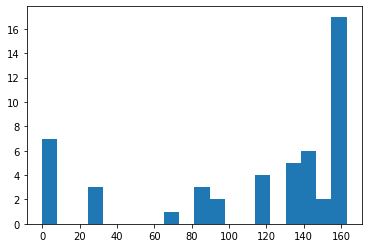

In [94]:
plt.hist(len_description, bins=20)
plt.show()

# Try and get article content

In [100]:
def get_text_from_url(url, description):
    try:
        page = requests.get(url)
        
        soup = BeautifulSoup(page.content, "html.parser")
        for script in soup(["script", "style"]):
            script.extract()

        text = soup.get_text()

        lines = (line.strip() for line in text.splitlines())

        chunks = (phrase.strip() for line in lines for phrase in line.split("  "))

        text = '\n'.join(chunk for chunk in chunks if chunk)

        clean_text = []

        for line in text.splitlines():
            if len(line) > 30:
                sentences = [description, line]
                embeddings = model.encode(sentences)
                result = 1 - spatial.distance.cosine(embeddings[0], embeddings[1])
                if result > 0.25:
                    clean_text.append(line)


        text = ". ".join(clean_text)
        return text
    
    except ContentDecodingError:
        pass

In [103]:
for result in results:
    description = result["description"]
    url = result["url"]
    print(get_text_from_url(url, description))
    print("--------------------------------------------------------------")


--------------------------------------------------------------

--------------------------------------------------------------
Couple who kept slaves in Bristol house known as 'gate to hell' are jailed | UK News | Sky News. Couple who kept slaves in Bristol house known as 'gate to hell' are jailed. Maros Tancos and Joanna Gomulska trafficked at least 29 vulnerable people to the UK after promising them a better life. In reality, the victims were kept as "prisoners" in a property, forced to work without pay and any wages were spent by the couple on cars and gambling.. Joanna Gomulska and Maros Tancos trafficked at least 29 vulnerable people to the UK. Pic: NCA. A couple have been jailed for a total of 25 years after keeping modern slaves in "squalor" in a Bristol house dubbed the "gate to hell".Maros Tancos and Joanna Gomulska trafficked at least 29 vulnerable people to the UK, some of whom had been raised in orphanages in Slovakia, after promising them a better life.In reality, they we